# Lab 9 Report: 
## Final Project Codebase

## Project Title: Same as your poster title

### Group Members:

--------------------

## Prepare Data

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import imageio.v3 as iio
import skimage.transform as transform
import os
import matplotlib.pyplot as plt
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import seaborn as sns
import tqdm

number of test images:  60  min_size:  (208, 233, 3)  max_size:  (777, 622, 3)
number of normal training images:  1500  min_size:  (168, 300, 3)  max_size:  (1080, 1920, 3)
number of tumorous training images:  1500  min_size:  (167, 175, 3)  max_size:  (1427, 1275)
number of tumorous testing images:  19  min_size:  (167, 175, 3)  max_size:  (1427, 1275)
number of normal testing images:  41  min_size:  (167, 175, 3)  max_size:  (1427, 1275)
Test images: 


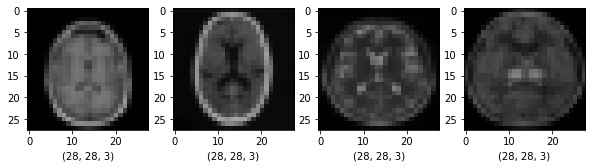

Normal images: 


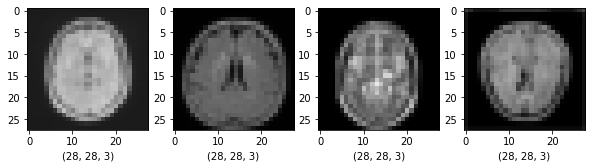

Tumorous images: 


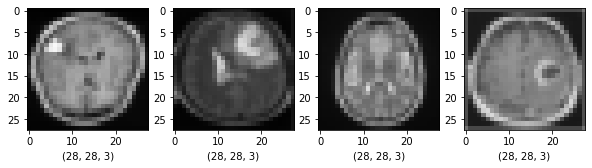

In [13]:
# convert .jpgs to array

# load images as list
def load_images(dir):
    images = []
    shapes = []
    for image_file in os.listdir(dir):
        if image_file.endswith('.jpg'):
            image = iio.imread(dir + '/' + image_file)
            images.append(image)
            shapes.append(image.shape)
            # print(image_file, im.shape)
    return images, shapes

# find size of images
def resize(images, norm_size):
    norm_images = []
    for image in images:
        norm_image = transform.resize(image, norm_size)
        norm_images.append(norm_image)
    return norm_images

# function for printing images
def print_images(title, images, count):
    print(title)

    plt.figure(figsize = (10, 10))
    for i in range(0, count):
        plt.subplot(1,count,i+1)
        plt.imshow(images[i])
        plt.xlabel(images[i].shape)

    plt.show()

# load all images
test_images = load_images('tumor_diagnosis/test')
print('number of test images: ', len(test_images[0]), ' min_size: ', min(test_images[1]), ' max_size: ', max(test_images[1]))

normal_images = load_images('tumor_diagnosis/train_normal')
print('number of normal training images: ', len(normal_images[0]), ' min_size: ', min(normal_images[1]), ' max_size: ', max(normal_images[1]))

tumorous_images = load_images('tumor_diagnosis/train_tumorous')
print('number of tumorous training images: ', len(tumorous_images[0]), ' min_size: ', min(tumorous_images[1]), ' max_size: ', max(tumorous_images[1]))

test_tumorous = load_images('tumor_diagnosis/test_tumorous')
print('number of tumorous testing images: ', len(test_tumorous[0]), ' min_size: ', min(tumorous_images[1]), ' max_size: ', max(tumorous_images[1]))

test_normal = load_images('tumor_diagnosis/test_normal')
print('number of normal testing images: ', len(test_normal[0]), ' min_size: ', min(tumorous_images[1]), ' max_size: ', max(tumorous_images[1]))



# normalize all images
norm_size = (28, 28, 3)
test_images_normalized = resize(test_images[0], norm_size)
normal_images_normalized = resize(normal_images[0], norm_size)
tumorous_images_normalized = resize(tumorous_images[0], norm_size)
test_tumorous_normalized = resize(test_tumorous[0], norm_size)
test_normal_normalized = resize(test_normal[0], norm_size)


# get numpy array from an image
#img_np = np.array(test_images[0][0])

# Visualizing the first several images
print_images('Test images: ', test_images_normalized, 4)
print_images('Normal images: ', normal_images_normalized, 4)
print_images('Tumorous images: ', tumorous_images_normalized, 4)

In [14]:
# flatten test_images_normalized/normal_images_normalized/tumorous_images_normalized
# convert to greyscale 

test_images_normalized_pn = np.array(test_images_normalized)
test_images_normalized_grey = 0.07 * test_images_normalized_pn[:,:,:,2] + 0.72 * test_images_normalized_pn[:,:,:,1] + 0.21 * test_images_normalized_pn[:,:,:,0]

normal_images_normalized_pn = np.array(normal_images_normalized)
normal_images_normalized_grey = 0.07 * normal_images_normalized_pn[:,:,:,2] + 0.72 * normal_images_normalized_pn[:,:,:,1] + 0.21 * normal_images_normalized_pn[:,:,:,0]

tumorous_images_normalized_pn = np.array(tumorous_images_normalized)
tumorous_images_normalized_grey = 0.07 * tumorous_images_normalized_pn[:,:,:,2] + 0.72 * tumorous_images_normalized_pn[:,:,:,1] + 0.21 * tumorous_images_normalized_pn[:,:,:,0]

test_tumorous_normalized_pn = np.array(test_tumorous_normalized)
test_tumorous_normalized_grey = 0.07 * test_tumorous_normalized_pn[:,:,:,2] + 0.72 * test_tumorous_normalized_pn[:,:,:,1] + 0.21 * test_tumorous_normalized_pn[:,:,:,0]

test_normal_normalized_pn = np.array(test_normal_normalized)
test_normal_normalized_grey = 0.07 * test_normal_normalized_pn[:,:,:,2] + 0.72 * test_normal_normalized_pn[:,:,:,1] + 0.21 * test_normal_normalized_pn[:,:,:,0]

test_images_normalized_grey.shape, normal_images_normalized_grey.shape, tumorous_images_normalized_grey.shape

((60, 28, 28), (1500, 28, 28), (1500, 28, 28))

In [15]:
# convert test_images_normalized_grey/normal_images_normalized_grey/tumorous_images_normalized_grey to features, targets

def shuffle(a, b):
    indexes = np.random.permutation(len(a) + len(b))
    features = []
    targets = []

    for i in indexes:
        if i < len(a):
            features.append(a[i])
            targets.append(0)
        else:
            features.append(b[i - len(a)])
            targets.append(1)
    return features, targets


In [16]:
# define training features, targets
features, targets = shuffle(normal_images_normalized_grey, tumorous_images_normalized_grey)

    # convert to array
train_features = np.array(features)
train_targets = np.array(targets)

train_features.shape, train_targets.shape


((3000, 28, 28), (3000,))

In [17]:
# define testing features, targets
features, targets = shuffle(test_normal_normalized_grey, test_tumorous_normalized_grey)

    # convert to array
test_features = np.array(features)
test_targets = np.array(targets)

test_features.shape, test_targets.shape


((60, 28, 28), (60,))

In [18]:
# Take the first 300 (10%) of training features and targets as validation set 

validation_features = train_features[:300]
validation_targets = train_targets[:300]

# Take the remaining 2700 of training features and targets as training set 

train_features = train_features[300:]
train_targets = train_targets[300:]

In [20]:
# Reshape train/validation/test sets to conform to PyTorch's (N, Channels, Height, Width) standard for CNNs

train_features = np.reshape(train_features, (len(train_features), 1, 28, 28))
validation_features = np.reshape(validation_features, (len(validation_features), 1, 28, 28))
test_features = np.reshape(test_features, (len(test_features), 1, 28, 28))

train_features.shape, validation_features.shape, test_features.shape


((2700, 1, 28, 28), (300, 1, 28, 28), (60, 1, 28, 28))

## Define Model

In [99]:
class CNNModel(torch.nn.Module):
    
    def __init__(self):
        super(CNNModel, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.fc1 = nn.Linear(in_features=64*6*6, out_features=600)
        self.drop = nn.Dropout(p=0.25)
        self.fc2 = nn.Linear(in_features=600, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=2)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)
        
        return out

## Define Hyperparameters

In [106]:
# Fix the random seed so that model performance is reproducible
torch.manual_seed(55)

# Initialize your CNN model

model = CNNModel()

# Define learning rate, epoch and batchsize for mini-batch gradient

learning_rate = 0.0001
epochs = 30
batchsize = 20

# Define loss function and optimizer

loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

model

CNNModel(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2304, out_features=600, bias=True)
  (drop): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=2, bias=True)
)

## Identify Tracked Values

In [107]:
train_loss_list = []
validation_accuracy_list = np.zeros((epochs,))

## Train Model

In [108]:
train_features = torch.FloatTensor(train_features)
train_targets = torch.LongTensor(train_targets)

validation_features = torch.FloatTensor(validation_features)
validation_targets = torch.LongTensor(validation_targets)

test_features = torch.FloatTensor(test_features)
test_targets = torch.LongTensor(test_targets)

train_batches_features = torch.split(train_features, batchsize)
train_batches_targets = torch.split(train_targets, batchsize)

batch_split_num = len(train_batches_features)

# Training Loop ---------------------------------------------------------------------------------------

for epoch in tqdm.trange(epochs):

    for i in range(batch_split_num):

        train_outputs = model.forward(train_batches_features[i])
        loss = loss_func(train_outputs, train_batches_targets[i])
        train_loss_list.append(loss.item())
        #print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Compute Validation Accuracy ----------------------------------------------------------------------

    with torch.no_grad():
        
        validation_outputs = model(validation_features)
        correct = (torch.argmax(validation_outputs, dim=1) == validation_targets).type(torch.FloatTensor)
        validation_accuracy_list[epoch] = correct.mean()

100%|██████████| 30/30 [01:08<00:00,  2.27s/it]


## Visualize & Evaluate Model

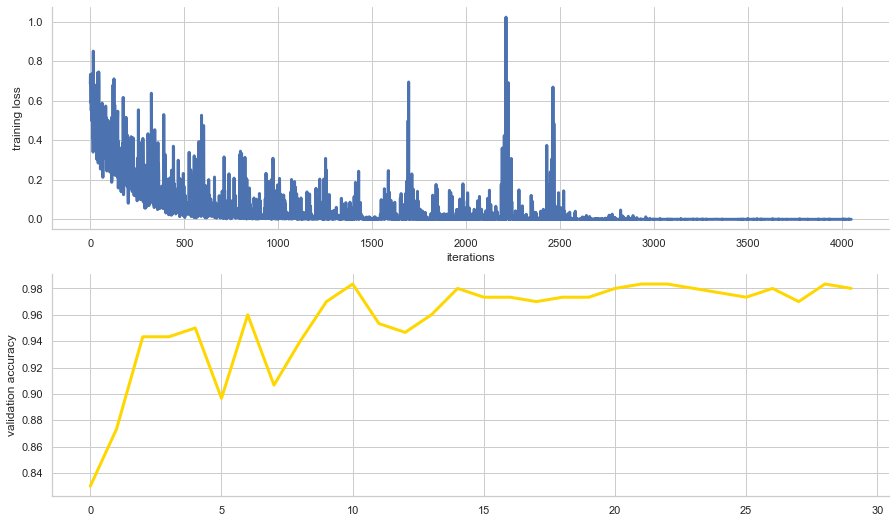

In [109]:
# Visualize training loss

sns.set(style = 'whitegrid', font_scale = 1)

plt.figure(figsize = (15, 9))

plt.subplot(2, 1, 1)
plt.plot(train_loss_list, linewidth = 3)
plt.ylabel("training loss")
plt.xlabel("iterations")
sns.despine()

plt.subplot(2, 1, 2)
plt.plot(validation_accuracy_list, linewidth = 3, color = 'gold')
plt.ylabel("validation accuracy")
sns.despine()


In [110]:
# Compute the testing accuracy 

with torch.no_grad():
    
    y_pred_test = model(test_features)
    
    correct = (torch.argmax(y_pred_test, dim=1) == test_targets).type(torch.FloatTensor)

    print("Testing Accuracy: " + str(correct.mean().numpy()*100) + '%')

Testing Accuracy: 85.00000238418579%


## Predict


no tumor
tensor(0)


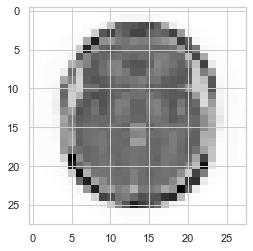

In [111]:
#test case [n]

n=22
plt.imshow(np.reshape(test_features[n], (28, 28)), cmap = 'Greys') 

with torch.no_grad():
    predict = model(test_features)

prediction = torch.argmax(predict[n])

if prediction.item()== 0:
    print("no tumor")
else:
    print("tumor")
    
print(test_targets[n])

tumor
tensor(1)


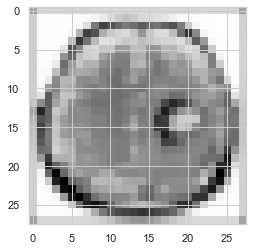

In [112]:
#test case [n]

n=11
plt.imshow(np.reshape(test_features[n], (28, 28)), cmap = 'Greys')

with torch.no_grad():
    predict = model(test_features)

prediction = torch.argmax(predict[n])

if prediction.item()== 0:
    print("no tumor")
else:
    print("tumor")
    
print(test_targets[n])